# Feature Descriptions:
**age**: Age of the patient (Numeric).

**sex**: Gender of the patient. Values: 1 = male, 0 = female.

**cp**: Chest pain type. Values: 0 = Typical angina, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Asymptomatic.

**trestbps**: Resting Blood Pressure (in mm Hg) (Numeric).

**chol**: Serum Cholesterol level (in mg/dl) (Numeric).

**fbs**: Fasting blood sugar > 120 mg/dl. Values: 1 = true, 0 = false.

**restecg**: Resting electrocardiographic results. Values: 0 = Normal, 1 = ST-T wave abnormality, 2 = Left ventricular hypertrophy.

**thalach**: Maximum heart rate achieved (Numeric).

**exang**: Exercise-induced angina. Values: 1 = yes, 0 = no.

**oldpeak**: ST depression induced by exercise relative to rest (Numeric).

**slope**: Slope of the peak exercise ST segment. Values: 0 = Upsloping, 1 = Flat, 2 = Downsloping.

**ca**: Number of major vessels (0-3) colored by fluoroscopy. Values: 0, 1, 2, 3.

**thal**: Thalassemia types. Values: 1 = Normal, 2 = Fixed defect, 3 = Reversible defect.

**target**: Outcome variable (heart attack risk). Values: 1 = more chance of heart attack, 0 = less chance of heart attack.


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Data Identification & Pre-Processing

In [86]:
heart = pd.read_csv("C:/Users/oadeb/Desktop/Machine Learning/Datasets/Heart Attack Prediction/cleaned_merged_heart_dataset.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [87]:
heart.shape

(1888, 14)

In [88]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1888.0,54.354343,9.081505,29.0,47.75,55.0,61.0,77.0
sex,1888.0,0.688559,0.463205,0.0,0.00,1.0,1.0,1.0
cp,1888.0,1.135593,1.103852,0.0,0.00,1.0,2.0,3.0
trestbps,1888.0,131.549258,17.556985,94.0,120.00,130.0,140.0,200.0
chol,1888.0,246.855403,51.609329,126.0,211.00,241.0,276.0,564.0
fbs,1888.0,0.148305,0.355496,0.0,0.00,0.0,0.0,1.0
restecg,1888.0,0.597458,0.638820,0.0,0.00,1.0,1.0,2.0
thalachh,1888.0,149.424258,23.006153,71.0,133.00,152.0,166.0,202.0
exang,1888.0,0.331568,0.470901,0.0,0.00,0.0,1.0,1.0
oldpeak,1888.0,1.053761,1.161344,0.0,0.00,0.8,1.6,6.2


In [89]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1888 non-null   int64  
 1   sex       1888 non-null   int64  
 2   cp        1888 non-null   int64  
 3   trestbps  1888 non-null   int64  
 4   chol      1888 non-null   int64  
 5   fbs       1888 non-null   int64  
 6   restecg   1888 non-null   int64  
 7   thalachh  1888 non-null   int64  
 8   exang     1888 non-null   int64  
 9   oldpeak   1888 non-null   float64
 10  slope     1888 non-null   int64  
 11  ca        1888 non-null   int64  
 12  thal      1888 non-null   int64  
 13  target    1888 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 206.6 KB


In [90]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##### Separating Features and Target into Numeric and Categorical

In [91]:
numeric_var=["age","trestbps","chol","thalachh","oldpeak"]
categoric_var=["sex","cp","fbs","restecg","exang","slope","ca","thal","target"]
print(heart[numeric_var].head())
print(heart[categoric_var].head())

   age  trestbps  chol  thalachh  oldpeak
0   63       145   233       150      2.3
1   37       130   250       187      3.5
2   41       130   204       172      1.4
3   56       120   236       178      0.8
4   57       120   354       163      0.6
   sex  cp  fbs  restecg  exang  slope  ca  thal  target
0    1   3    1        0      0      0   0     1       1
1    1   2    0        1      0      0   0     2       1
2    0   1    0        0      0      2   0     2       1
3    1   1    0        1      0      2   0     2       1
4    0   0    0        1      1      2   0     2       1


## Data Visualization (EDA)

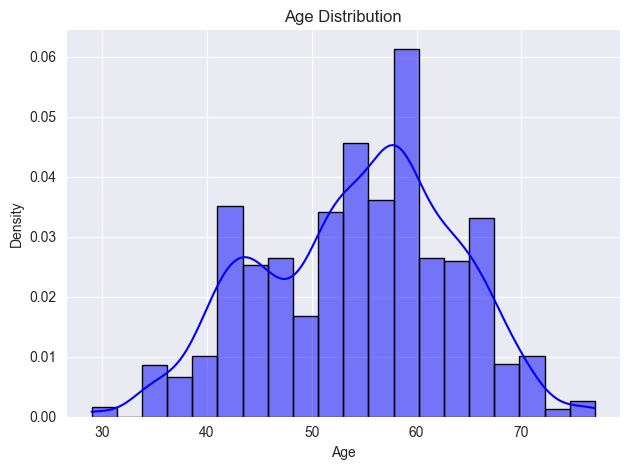

In [92]:
sns.histplot(heart['age'], linewidth=1, edgecolor='black', color='blue', kde=True, stat='density', bins=20)
plt.title('Age Distribution')
plt.ylabel('Density')
plt.xlabel('Age')
sns.despine()
plt.tight_layout()
plt.show()

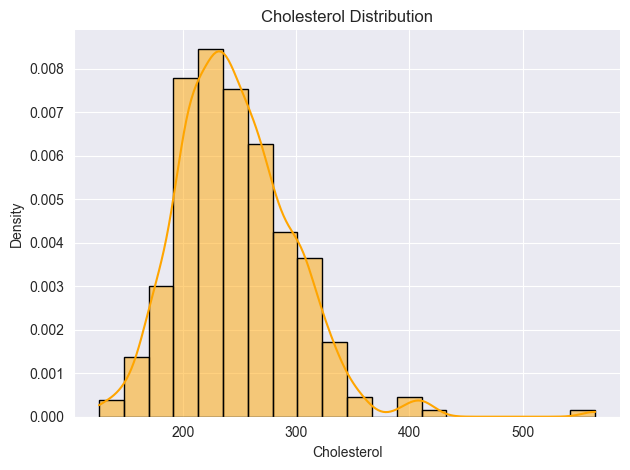

In [93]:
sns.histplot(heart['chol'], linewidth=1, edgecolor='black', color='orange', kde=True, stat='density', bins=20)
plt.title('Cholesterol Distribution')
plt.ylabel('Density')
plt.xlabel('Cholesterol')
sns.despine()
plt.tight_layout()
plt.show()

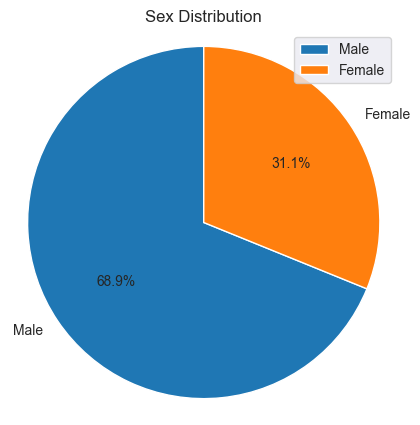

In [94]:
labels = ['Male', 'Female']
sizes = [heart['sex'].value_counts()[1], heart['sex'].value_counts()[0]]

plt.figure(figsize=(5, 5))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Sex Distribution')
plt.axis('equal')  # Ensures a perfect circle
plt.legend()
plt.show()

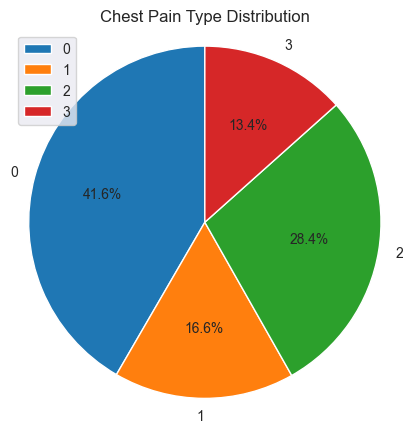

In [95]:
labels = ['0', '1', '2', '3']
sizes = [heart['cp'].value_counts()[0], heart['cp'].value_counts()[1], heart['cp'].value_counts()[2], heart['cp'].value_counts()[3]]

plt.figure(figsize=(5, 5))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Chest Pain Type Distribution')
plt.axis('equal')  # Ensures a perfect circle
plt.legend()
plt.show()

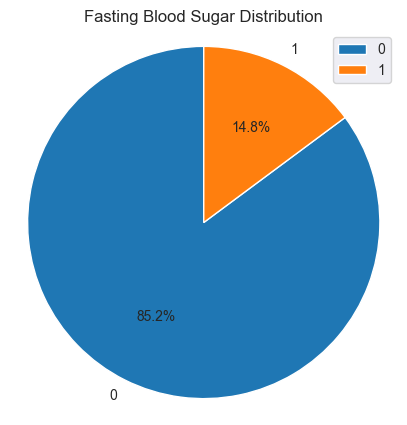

In [96]:
labels = ['0', '1']
sizes = [heart['fbs'].value_counts()[0], heart['fbs'].value_counts()[1]]

plt.figure(figsize=(5, 5))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Fasting Blood Sugar Distribution')
plt.axis('equal')  # Ensures a perfect circle
plt.legend()
plt.show()

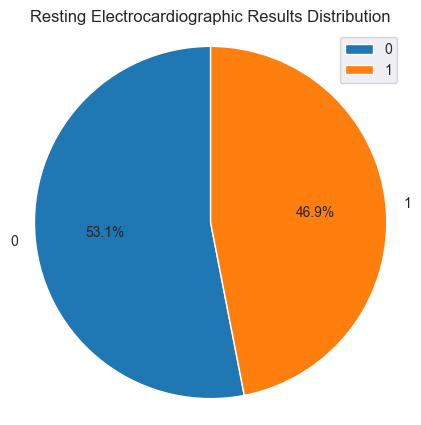

In [97]:
labels = ['0', '1']
sizes = [heart['restecg'].value_counts()[0], heart['restecg'].value_counts()[1]]

plt.figure(figsize=(5, 5))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Resting Electrocardiographic Results Distribution')
plt.axis('equal')  # Ensures a perfect circle
plt.legend()
plt.show()

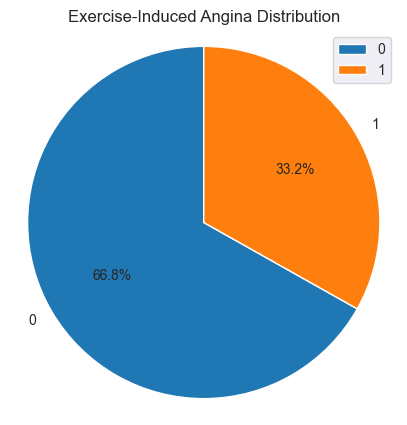

In [98]:
labels = ['0', '1']
sizes = [heart['exang'].value_counts()[0], heart['exang'].value_counts()[1]]

plt.figure(figsize=(5, 5))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Exercise-Induced Angina Distribution')
plt.axis('equal')  # Ensures a perfect circle
plt.legend()
plt.show()

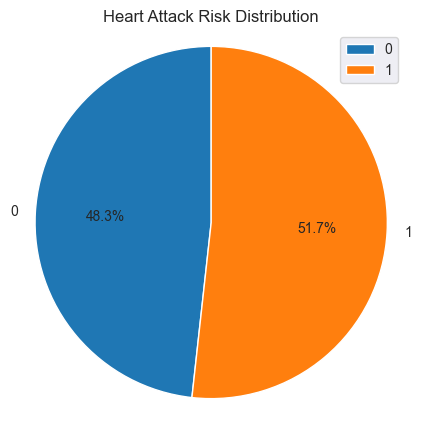

In [99]:
labels = ['0', '1']
sizes = [heart['target'].value_counts()[0], heart['target'].value_counts()[1]]

plt.figure(figsize=(5, 5))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Heart Attack Risk Distribution')
plt.axis('equal')  # Ensures a perfect circle
plt.legend()
plt.show()

In [100]:
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.104266,-0.042752,0.271607,0.221379,0.119464,-0.059987,-0.392916,0.092343,0.205371,-0.121312,0.283840,0.053396,-0.162303
sex,-0.104266,1.000000,-0.035520,-0.068685,-0.198892,0.032837,-0.031690,-0.053983,0.145680,0.092515,-0.020484,0.104863,0.168063,-0.196214
cp,-0.042752,-0.035520,1.000000,0.031046,-0.050474,0.060817,0.147336,0.198605,-0.269027,-0.109615,0.156571,-0.120645,0.243273,0.371258
trestbps,0.271607,-0.068685,0.031046,1.000000,0.136976,0.171784,-0.056821,-0.041222,0.067186,0.196181,-0.084387,0.098762,0.054935,-0.095875
chol,0.221379,-0.198892,-0.050474,0.136976,1.000000,0.024681,-0.062365,-0.021208,0.073496,0.058111,-0.009180,0.080456,0.063576,-0.071589
fbs,0.119464,0.032837,0.060817,0.171784,0.024681,1.000000,-0.054344,-0.000829,0.035332,0.000702,-0.045836,0.132365,-0.004210,-0.032491
restecg,-0.059987,-0.031690,0.147336,-0.056821,-0.062365,-0.054344,1.000000,0.021038,-0.029963,-0.016102,0.131779,-0.038458,0.174936,0.123289
thalachh,-0.392916,-0.053983,0.198605,-0.041222,-0.021208,-0.000829,0.021038,1.000000,-0.381478,-0.349612,0.277653,-0.215914,-0.100009,0.298795
exang,0.092343,0.145680,-0.269027,0.067186,0.073496,0.035332,-0.029963,-0.381478,1.000000,0.299862,-0.188768,0.117558,0.158651,-0.315084
oldpeak,0.205371,0.092515,-0.109615,0.196181,0.058111,0.000702,-0.016102,-0.349612,0.299862,1.000000,-0.408819,0.221370,0.160869,-0.315629


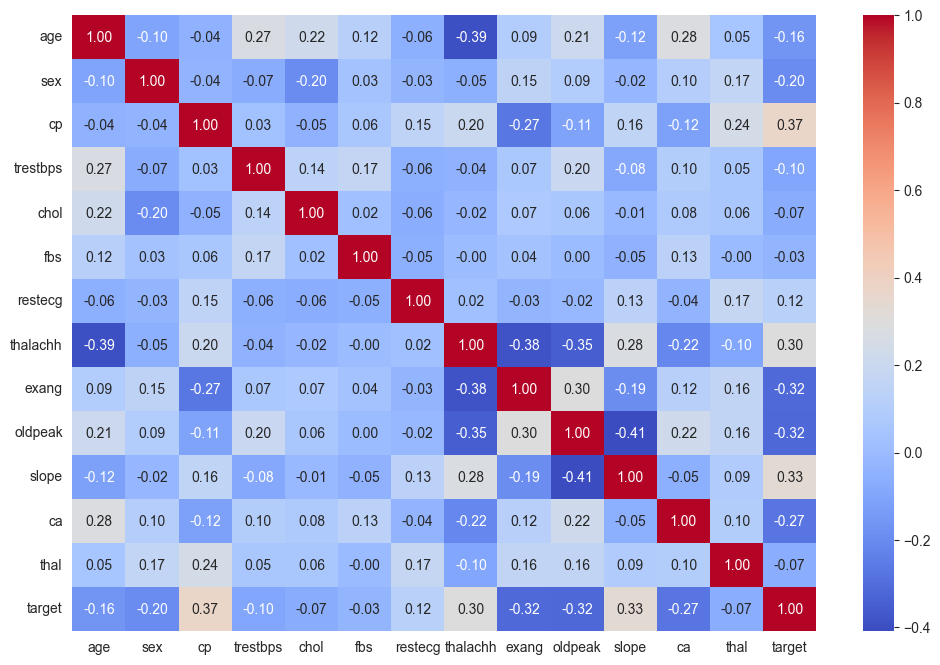

In [101]:
plt.figure(figsize=(12,8))
sns.heatmap(heart.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [102]:
heart.corr()["target"].sort_values(ascending=False)

target      1.000000
cp          0.371258
slope       0.333837
thalachh    0.298795
restecg     0.123289
fbs        -0.032491
thal       -0.067322
chol       -0.071589
trestbps   -0.095875
age        -0.162303
sex        -0.196214
ca         -0.273105
exang      -0.315084
oldpeak    -0.315629
Name: target, dtype: float64

### Creating Training and Testing Sets

In [103]:
x = pd.DataFrame(heart.iloc[:, :-1])  # Selecting all Features. Removing the last column (target)
y = pd.DataFrame(heart.iloc[:, -1])   # Selecting the last column (target)

In [104]:
# Importing the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

In [105]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1510, 13)
(378, 13)
(1510, 1)
(378, 1)


## Model Training and Evaluation

#### Logistic Regression

In [106]:
# Importing modules for fitting and evaluating the model
from sklearn.linear_model import LogisticRegression

# Creating an instance of the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)    # Fitting the model to the training data

C:\Users\oadeb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\oadeb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predicting Test Set Results

In [107]:
y_pred = logreg.predict(x_test)

In [108]:
len(y_pred)

378

## Calculating Accuracy

In [109]:
print("Accuracy:", logreg.score(x_train, y_train))

Accuracy: 0.7582781456953642


In [110]:
print("Accuracy:", logreg.score(x_test, y_test))

Accuracy: 0.7645502645502645


## Evaluation of Model Using Confusion Matrix

In [123]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, logreg.predict(x_train))
print(confusion_matrix)

[[511 220]
 [145 634]]


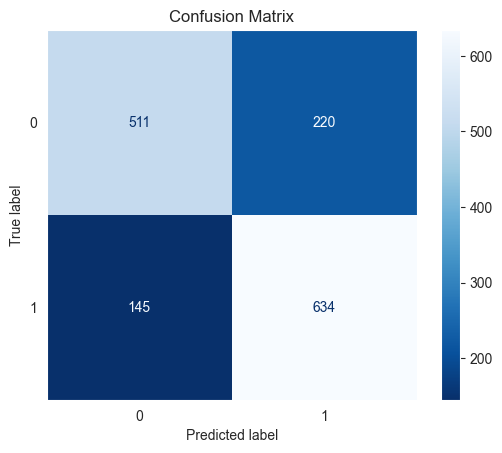

In [124]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
ax = disp.plot(cmap="Blues_r").ax_
ax.grid(False)

plt.title("Confusion Matrix")
plt.show()

## Evaluation of Model Using Classification Report

In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_train, logreg.predict(x_train)))  # this is for training data logreg.predict(x_train) represents predictions for the training set.

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       731
           1       0.74      0.81      0.78       779

    accuracy                           0.76      1510
   macro avg       0.76      0.76      0.76      1510
weighted avg       0.76      0.76      0.76      1510



In [125]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[126  54]
 [ 35 163]]


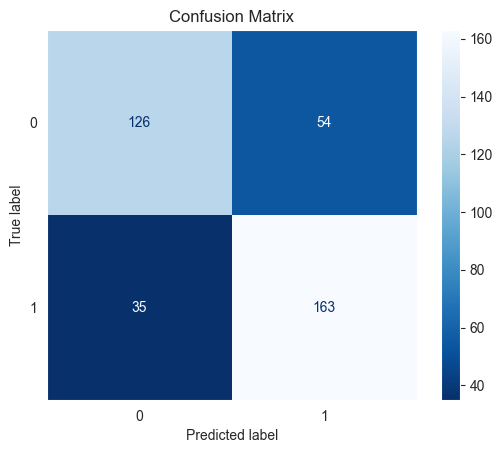

In [126]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
ax = disp.plot(cmap="Blues_r").ax_
ax.grid(False)

plt.title("Confusion Matrix")
plt.show()

## Evaluation of Model Using Classification Report

In [116]:
 from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))  # this is for testing data y_pred represents predictions for the testing set.

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       180
           1       0.75      0.82      0.79       198

    accuracy                           0.76       378
   macro avg       0.77      0.76      0.76       378
weighted avg       0.77      0.76      0.76       378

